## Model Statistics

## K-Fold tests and T-Tests comparisons with SCIKIT LEARN MODELS

In [122]:
import pandas as pd
import numpy as np
import math
import scipy.stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import scipy.spatial
import operator
from naiveBayes import NaiveBayesClassifier
from knn import KNearestNeighborClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

In [123]:
# Get Data Set for running tests
diabetes =  pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
#divide dataset into train and test 
data = diabetes.copy(deep=True)
target = data["Outcome"]
del data["Outcome"]
#Split data into train and test
DiabetesX_train, DiabetesX_test, Diabetesy_train, Diabetesy_test = train_test_split(data, target, test_size=0.33)

# Naive Bayes

In [7]:
#note GaussianNB is SciKit Learn's model and NaiveBayesClassifier is our classification

## Run KFold Tests

In [83]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(pd.DataFrame(X_train), pd.Series(y_train))
    return model.score(pd.DataFrame(X_test), pd.Series(y_test))

In [103]:
kf = KFold(n_splits=10,random_state=True)
kf.get_n_splits(data)

10

In [104]:
kfoldScores = []

for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = np.array(data)[train_index], np.array(data)[test_index], \
                                       np.array(target)[train_index], np.array(target)[test_index]
    kfoldScores.append(get_score(NaiveBayesClassifier(), X_train, X_test, y_train, y_test))
    kfoldScores_SCIKITLEARNMODEL.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))

Model Trained
Model Trained
Model Trained
Model Trained
Model Trained
Model Trained
Model Trained
Model Trained
Model Trained
Model Trained


In [105]:
kf = KFold(n_splits=10,random_state=True)

In [106]:
kfoldScores_SCIKITLEARNMODEL = []
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = np.array(data)[train_index], np.array(data)[test_index], \
                                       np.array(target)[train_index], np.array(target)[test_index]
    kfoldScores_SCIKITLEARNMODEL.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))

In [107]:
print("OUR implementation K-Fold scores\n",kfoldScores )

print("Mean Score", np.array(kfoldScores).mean() )


OUR implementation K-Fold scores
 [0.7012987012987013, 0.7922077922077922, 0.7142857142857143, 0.6623376623376623, 0.7402597402597403, 0.7532467532467533, 0.7532467532467533, 0.8051948051948052, 0.75, 0.7631578947368421]
Mean Score 0.7435235816814764


In [108]:
print("Scikit-learn implementation K-Fold scores\n",kfoldScores_SCIKITLEARNMODEL )
print("Mean Score", np.array(kfoldScores_SCIKITLEARNMODEL).mean() )

Scikit-learn implementation K-Fold scores
 [0.6753246753246753, 0.8051948051948052, 0.7532467532467533, 0.7142857142857143, 0.7272727272727273, 0.7662337662337663, 0.8051948051948052, 0.8181818181818182, 0.7368421052631579, 0.75]
Mean Score 0.7551777170198223


## Now,  a Pairwise T-Test for 0.05 siginificance level

In [109]:
#first calculate error rates for each model

In [110]:
error_rate1 = 1 - np.array(kfoldScores)
error_rate1

array([0.2987013 , 0.20779221, 0.28571429, 0.33766234, 0.25974026,
       0.24675325, 0.24675325, 0.19480519, 0.25      , 0.23684211])

In [111]:
error_rate1.mean()

0.2564764183185236

In [112]:
error_rate2_sciKit = 1 - np.array(kfoldScores_SCIKITLEARNMODEL)
error_rate2_sciKit

array([0.32467532, 0.19480519, 0.24675325, 0.28571429, 0.27272727,
       0.23376623, 0.19480519, 0.18181818, 0.26315789, 0.25      ])

In [113]:
error_rate2_sciKit.mean()

0.2448222829801777

In [114]:
from scipy import stats

In [115]:
stats.ttest_rel(error_rate1, error_rate2_sciKit)

Ttest_relResult(statistic=1.2982442580121862, pvalue=0.22648333716905905)

In [27]:
#There is a statistically significant difference between the two models (0.22 > 0.05) (reject the null)

# KNN

In [ ]:
#note neighbors.KNeighborsClassifier(5) is SciKit Learn's model and KNearestNeighborClassifier() is our classification

In [44]:
from sklearn import neighbors

In [45]:
n= int(np.sqrt(len(data)))

In [46]:
#now run K-Fold tests

In [ ]:
#note: This might take a while!!!

In [76]:
knn_kfoldScores = []
scikit_knn_kfoldScores = []
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = np.array(data)[train_index], np.array(data)[test_index], \
                                       np.array(target)[train_index], np.array(target)[test_index]
    knn_kfoldScores.append(get_score(KNearestNeighborClassifier(), X_train, X_test, y_train, y_test))
    scikit_knn_kfoldScores.append(get_score(neighbors.KNeighborsClassifier(n), X_train, X_test, y_train, y_test))

In [77]:

print("OUR implementation K-Fold scores\n",knn_kfoldScores )

print("Mean Score", np.array(knn_kfoldScores).mean() )

OUR implementation K-Fold scores
 [0.7402597402597403, 0.7922077922077922, 0.7012987012987013, 0.5584415584415584, 0.7662337662337663, 0.7532467532467533, 0.8051948051948052, 0.8441558441558441, 0.7631578947368421, 0.75]
Mean Score 0.7474196855775803


In [78]:

print("Scikit-learn implementation K-Fold scores\n",scikit_knn_kfoldScores )
print("Mean Score", np.array(scikit_knn_kfoldScores).mean() )

Scikit-learn implementation K-Fold scores
 [0.7012987012987013, 0.7792207792207793, 0.7012987012987013, 0.5584415584415584, 0.7922077922077922, 0.7532467532467533, 0.7922077922077922, 0.8441558441558441, 0.7894736842105263, 0.7236842105263158]
Mean Score 0.7435235816814765


## Now, a Pairwise T-Test for 0.05 siginificance level

In [79]:
error_rate1 = 1 - np.array(knn_kfoldScores)
error_rate1

array([0.25974026, 0.20779221, 0.2987013 , 0.44155844, 0.23376623,
       0.24675325, 0.19480519, 0.15584416, 0.23684211, 0.25      ])

In [80]:
error_rate1.mean()

0.2525803144224197

In [65]:
error_rate2_sciKit = 1 - np.array(scikit_knn_kfoldScores)
error_rate2_sciKit

array([0.2987013 , 0.22077922, 0.2987013 , 0.44155844, 0.20779221,
       0.24675325, 0.20779221, 0.15584416, 0.21052632, 0.27631579])

In [81]:
error_rate2_sciKit.mean()


0.2574864184185236

In [82]:
stats.ttest_rel(error_rate1, error_rate2_sciKit)

Ttest_relResult(statistic=-0.7323877353928927, pvalue=0.48256818120551603)

## Confusion Matrix 

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [134]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Confusion Matrix for our implementation of Naive Bayes

In [223]:
DiabetesX_train, DiabetesX_test, Diabetesy_train, Diabetesy_test = train_test_split(data, target, test_size=0.33)

In [224]:
nbc = NaiveBayesClassifier()
# DiabetesX_train, DiabetesX_test, Diabetesy_train, Diabetesy_test
nbc.fit(DiabetesX_train,Diabetesy_train)
preds = nbc.predict(DiabetesX_test)

Model Trained


In [225]:
y_test = Diabetesy_test
y_pred = preds

In [226]:
cm = confusion_matrix(y_test, y_pred)
help(confusion_matrix(y_test, y_pred))

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [227]:
tn, fp = cm[0]
fn, tp = cm[1]

In [228]:
class_names= pd.Index(["No Diabetes","Diabetes"])


In [229]:
ourNaiveBayesData = {"tn":tn, "fp":fp, "fn":fn,"tp":tp}

Confusion matrix, without normalization
[[136  24]
 [ 33  61]]


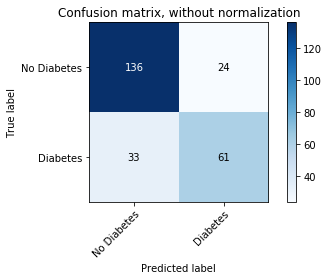

In [230]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


Normalized confusion matrix
[[0.85       0.15      ]
 [0.35106383 0.64893617]]


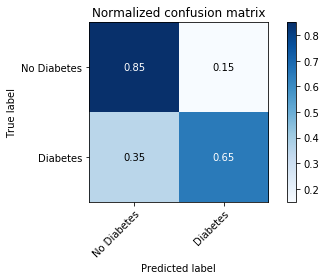

In [231]:

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [232]:
#here compute sensitivity, accuracy, etc

## Confusion Matrix for Scikit learn Gaussian Naive Bayes

In [233]:
sci_nbc = GaussianNB()
# DiabetesX_train, DiabetesX_test, Diabetesy_train, Diabetesy_test
sci_nbc.fit(DiabetesX_train,Diabetesy_train)
sci_nbc_preds = sci_nbc.predict(DiabetesX_test)

In [234]:
y_test = Diabetesy_test
y_pred = sci_nbc_preds

In [235]:
cm = confusion_matrix(y_test, y_pred)

In [236]:
cm

array([[144,  16],
       [ 42,  52]])

Confusion matrix, without normalization
[[144  16]
 [ 42  52]]


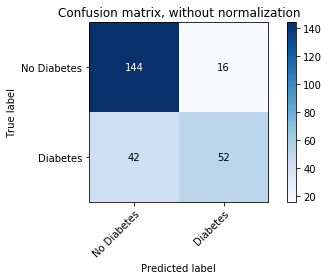

In [237]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')



Normalized confusion matrix
[[0.9        0.1       ]
 [0.44680851 0.55319149]]


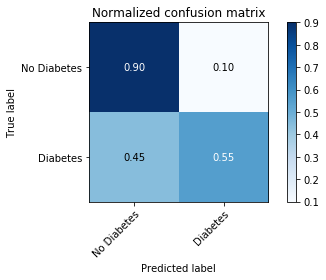

In [238]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# KNN Confusion Matrix

In [239]:
knn = KNearestNeighborClassifier()

In [241]:
# DiabetesX_train, DiabetesX_test, Diabetesy_train, Diabetesy_test
knn.fit(DiabetesX_train,Diabetesy_train)
knnpreds = knn.predict(DiabetesX_test)

In [242]:
y_test = Diabetesy_test
y_pred = knnpreds

In [243]:
cm = confusion_matrix(y_test, y_pred)

In [244]:
cm

array([[148,  12],
       [ 54,  40]])

Confusion matrix, without normalization
[[148  12]
 [ 54  40]]


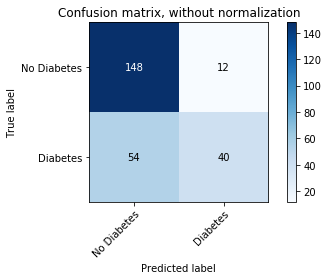

In [245]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.925      0.075     ]
 [0.57446809 0.42553191]]


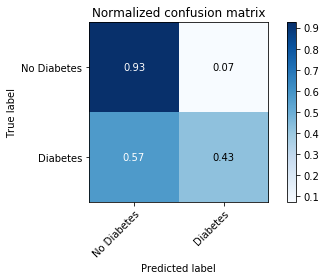

In [246]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# Confusion Matrix Scikit learn knn

In [247]:
n= int(np.sqrt(len(data)))

In [249]:
sci_knn = neighbors.KNeighborsClassifier(n)

In [250]:
# DiabetesX_train, DiabetesX_test, Diabetesy_train, Diabetesy_test
sci_knn.fit(DiabetesX_train,Diabetesy_train)
sci_knnpreds = sci_knn.predict(DiabetesX_test)

In [251]:
y_test = Diabetesy_test
y_pred = sci_knnpreds

In [252]:
cm = confusion_matrix(y_test, y_pred)

In [253]:
cm

array([[147,  13],
       [ 53,  41]])

Confusion matrix, without normalization
[[147  13]
 [ 53  41]]


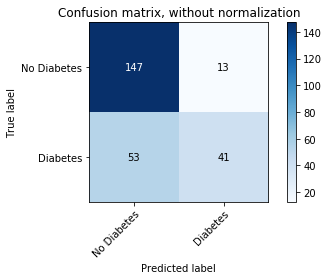

In [254]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix
[[0.91875    0.08125   ]
 [0.56382979 0.43617021]]


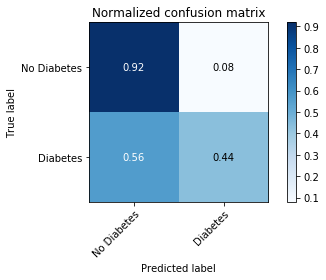

In [255]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')